In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
print(os.listdir("E:\Loan"))

['LCDataDictionary.xlsx', 'loan.csv']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 500)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [5]:
df = pd.read_csv('loan.csv')

C:\Users\AADHI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape

(887379, 74)

In [7]:
df= df.sample(frac=0.4, random_state= 1)

In [8]:
df.shape

(354952, 74)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354952 entries, 640016 to 872385
Data columns (total 74 columns):
id                             354952 non-null int64
member_id                      354952 non-null int64
loan_amnt                      354952 non-null float64
funded_amnt                    354952 non-null float64
funded_amnt_inv                354952 non-null float64
term                           354952 non-null object
int_rate                       354952 non-null float64
installment                    354952 non-null float64
grade                          354952 non-null object
sub_grade                      354952 non-null object
emp_title                      334263 non-null object
emp_length                     336890 non-null object
home_ownership                 354952 non-null object
annual_inc                     354951 non-null float64
verification_status            354952 non-null object
issue_d                        354952 non-null object
loan_status     

In [10]:
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
dti_joint,354756,99.944781
verification_status_joint,354755,99.944500
annual_inc_joint,354755,99.944500
il_util,347504,97.901688
mths_since_rcnt_il,346620,97.652640
all_util,346403,97.591505
max_bal_bc,346403,97.591505
open_rv_24m,346403,97.591505
open_rv_12m,346403,97.591505
total_cu_tl,346403,97.591505


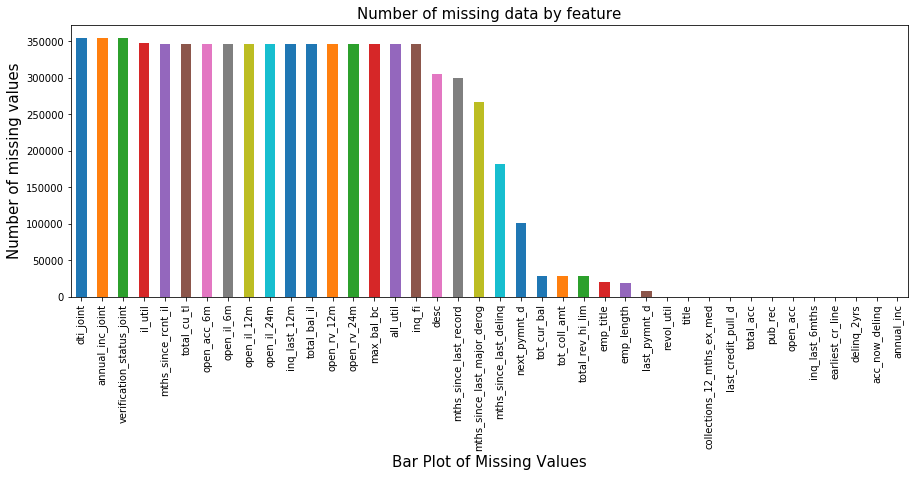

In [11]:
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

plt.show()

In [12]:
# Any variable having missing values more than 50 percent are removed
df.drop(["dti_joint", "verification_status_joint", "annual_inc_joint", "il_util", "mths_since_rcnt_il",
            "all_util", "max_bal_bc", "open_rv_24m", "open_rv_12m", "total_cu_tl", "total_bal_il", "open_il_24m",
            "open_il_12m", "total_cu_tl", "total_bal_il", "open_il_24m", "open_il_12m", "open_il_6m", "open_acc_6m",
            "inq_fi", "inq_last_12m", "desc", "mths_since_last_record", "mths_since_last_major_derog",
            "mths_since_last_delinq", "next_pymnt_d", "total_rev_hi_lim", "tot_cur_bal", "tot_coll_amt"], axis=1,
           inplace=True)

# Delete unwanted columns
df.drop(["id", "url", "member_id"], axis=1, inplace=True)

# Payment plan has all the values "n" and only 3 values "y" so it is not important
df.drop(["pymnt_plan"], axis=1, inplace=True)

# Since we have both address state and zip code let's drop zip code and use address state only
df.drop(["zip_code"], axis=1, inplace=True)

# Title is not important instead we will use "purpose" variable
df.drop(["title"], axis=1, inplace=True)

# The grade is implied by the subgrade, so let's drop the grade column.
df.drop(["grade"], axis=1, inplace=True)

In [13]:
# remove "months" from "36 months" and convert it to int type
df["term"]= df['term'].map(lambda x: x.rstrip('months'))
df["term"]= df["term"].astype("int")

In [14]:
# Again Check missing values count and percent in remaining columns
total= df.isnull().sum().sort_values(ascending=False)
percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(15)

,Total,Percent
emp_title,20689,5.828675
emp_length,18062,5.088575
last_pymnt_d,7096,1.999144
revol_util,210,0.059163
collections_12_mths_ex_med,47,0.013241
last_credit_pull_d,19,0.005353
acc_now_delinq,11,0.003099
total_acc,11,0.003099
delinq_2yrs,11,0.003099
earliest_cr_line,11,0.003099


Text(0,0.5,'Loan Amount')

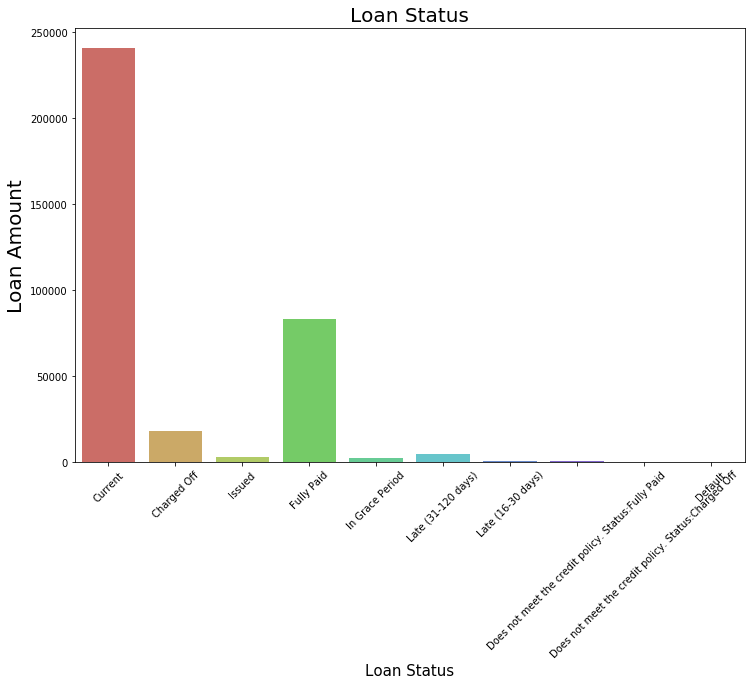

In [15]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)


In [16]:
df["emp_title"].value_counts(ascending=False).head()
df["emp_title"]= df["emp_title"].fillna(df["emp_title"].mode()[0])

In [17]:
df["emp_length"].value_counts(ascending=False).head()
df["emp_length"]= df["emp_length"].fillna(df["emp_length"].mode()[0])


In [18]:
df["last_pymnt_d"]= pd.to_datetime(df["last_pymnt_d"])
df["last_pymnt_d"].value_counts(ascending=False).head()
# Lets fill mode value in place of the missing value
df["last_pymnt_d"]= df["last_pymnt_d"].fillna(df["last_pymnt_d"].mode()[0])

In [19]:
df["revol_util"].value_counts(ascending=False).head()
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].median())

In [20]:
df["purpose"].value_counts(ascending=False).head()
df["purpose"]= df["purpose"].fillna(df["purpose"].mode()[0])

In [21]:
df["collections_12_mths_ex_med"].value_counts()
df["collections_12_mths_ex_med"]= df["collections_12_mths_ex_med"].fillna(df["collections_12_mths_ex_med"].mode()[0])


In [22]:
df["last_credit_pull_d"]= pd.to_datetime(df["last_credit_pull_d"])
df["last_credit_pull_d"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["last_credit_pull_d"]= df["last_credit_pull_d"].fillna(df["last_credit_pull_d"].mode()[0])


In [23]:
df["acc_now_delinq"].value_counts(ascending=False)
df["acc_now_delinq"]= df["acc_now_delinq"].fillna(df["acc_now_delinq"].mode()[0])

In [24]:
df["total_acc"].value_counts(ascending=False)
df["total_acc"]= df["total_acc"].fillna(df["total_acc"].median())

In [25]:
df["open_acc"].value_counts(ascending=False)
df["open_acc"]= df["open_acc"].fillna(df["open_acc"].median())

In [26]:
df["earliest_cr_line"]= pd.to_datetime(df["earliest_cr_line"])
df["earliest_cr_line"].value_counts(ascending=False).head()

# Lets fill mode value in place of the missing value
df["earliest_cr_line"]= df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0])

In [27]:
df["inq_last_6mths"].value_counts(ascending=False)
df["inq_last_6mths"]= df["inq_last_6mths"].fillna(df["inq_last_6mths"].mode()[0])

In [28]:
df["pub_rec"].value_counts(ascending=False)
df["pub_rec"]= df["pub_rec"].fillna(df["pub_rec"].mode()[0])

In [29]:
df["delinq_2yrs"].value_counts(ascending=False)
df["delinq_2yrs"]= df["delinq_2yrs"].fillna(df["delinq_2yrs"].mode()[0])

In [30]:
df["annual_inc"].value_counts(ascending=False)
df["annual_inc"]= df["annual_inc"].fillna(df["annual_inc"].median())


In [31]:
df["earliest_cr_line"] = pd.DatetimeIndex(df["earliest_cr_line"]).month
df["last_pymnt_d"] = pd.DatetimeIndex(df["last_pymnt_d"]).month
df["last_credit_pull_d"] = pd.DatetimeIndex(df["last_credit_pull_d"]).month


In [32]:
df["loan_status"].value_counts()

Current                                                240622
Fully Paid                                              83239
Charged Off                                             18095
Late (31-120 days)                                       4617
Issued                                                   3341
In Grace Period                                          2527
Late (16-30 days)                                         938
Does not meet the credit policy. Status:Fully Paid        793
Default                                                   481
Does not meet the credit policy. Status:Charged Off       299
Name: loan_status, dtype: int64

In [33]:
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Issued") |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Loan Amount')

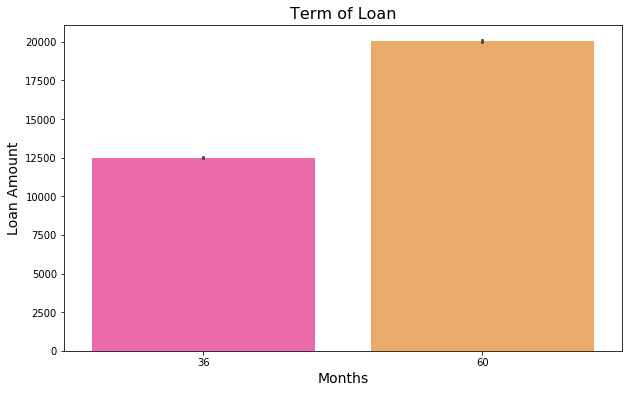

In [34]:
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Frequency Distribuition- Loan Amount')

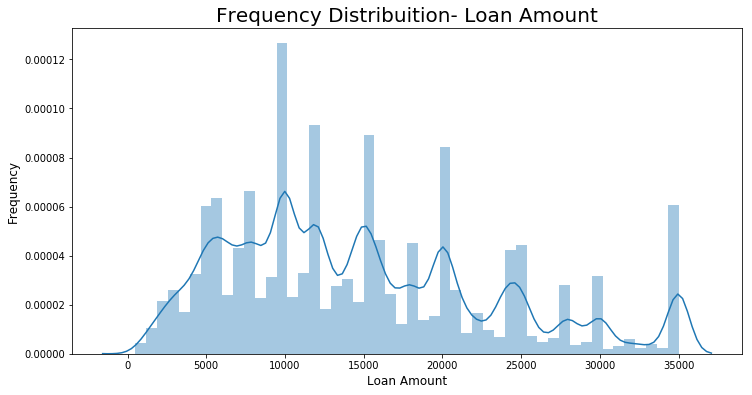

In [35]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

C:\Users\AADHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Int Rate Distribuition')

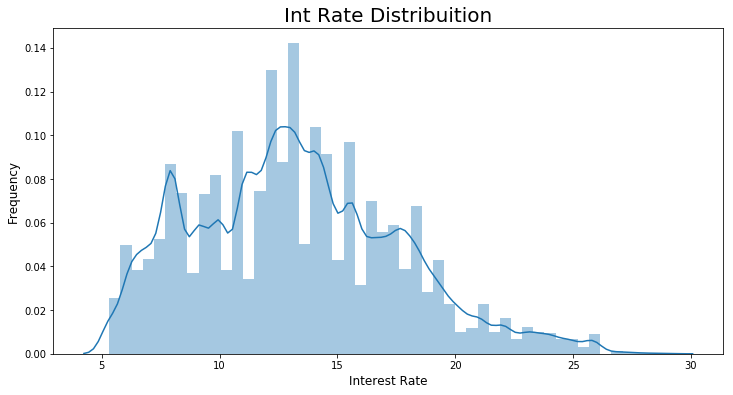

In [36]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0,0.5,'Loan Amount')

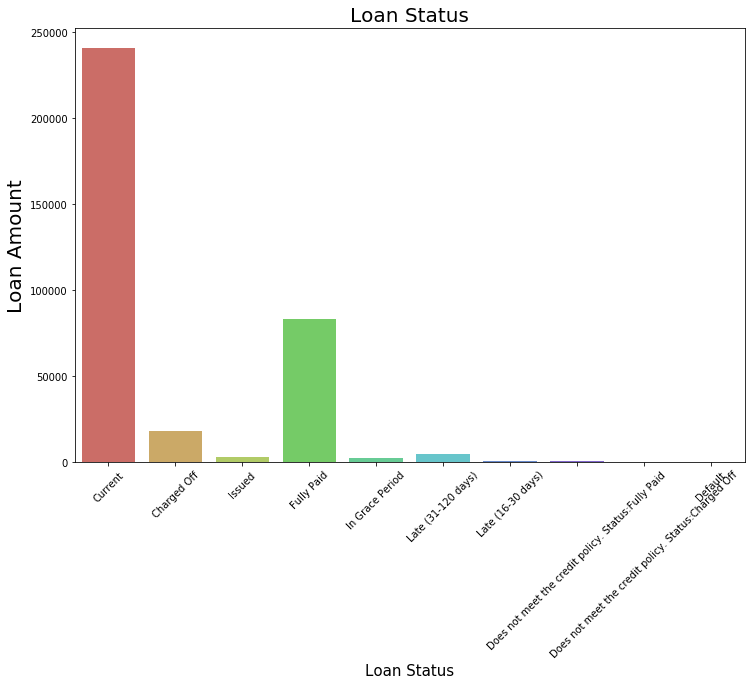

In [37]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)


Text(0,0.5,'Loan Amount')

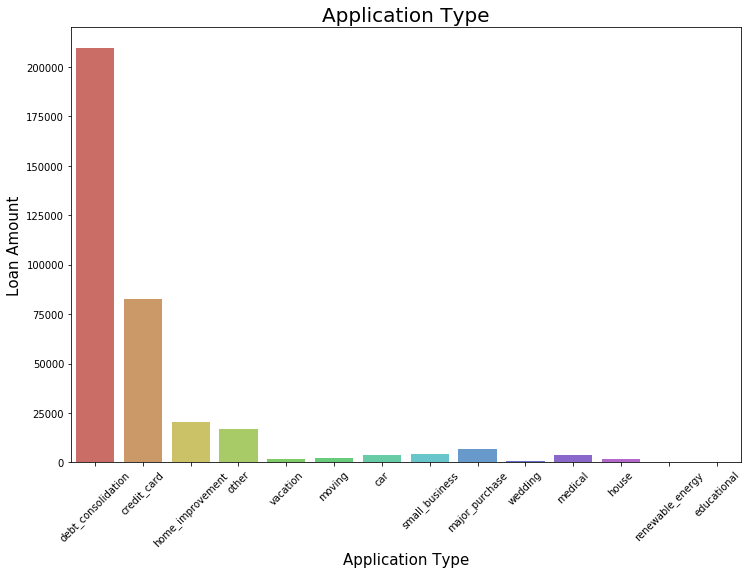

In [38]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

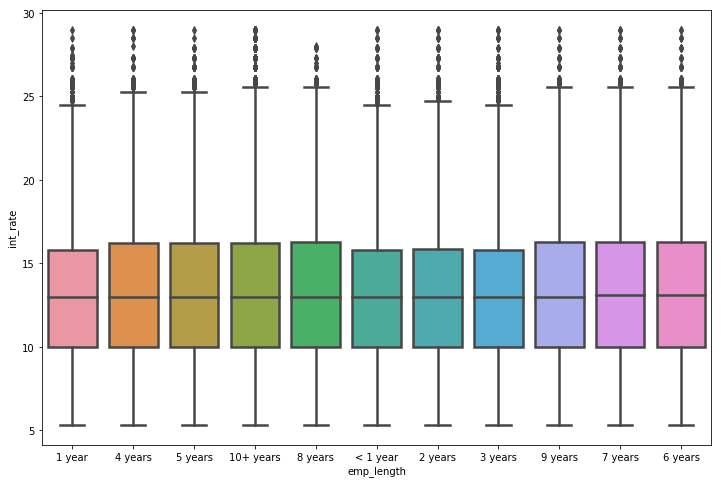

In [39]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x="emp_length" ,y= "int_rate", data=df, linewidth=2.5)

plt.show()

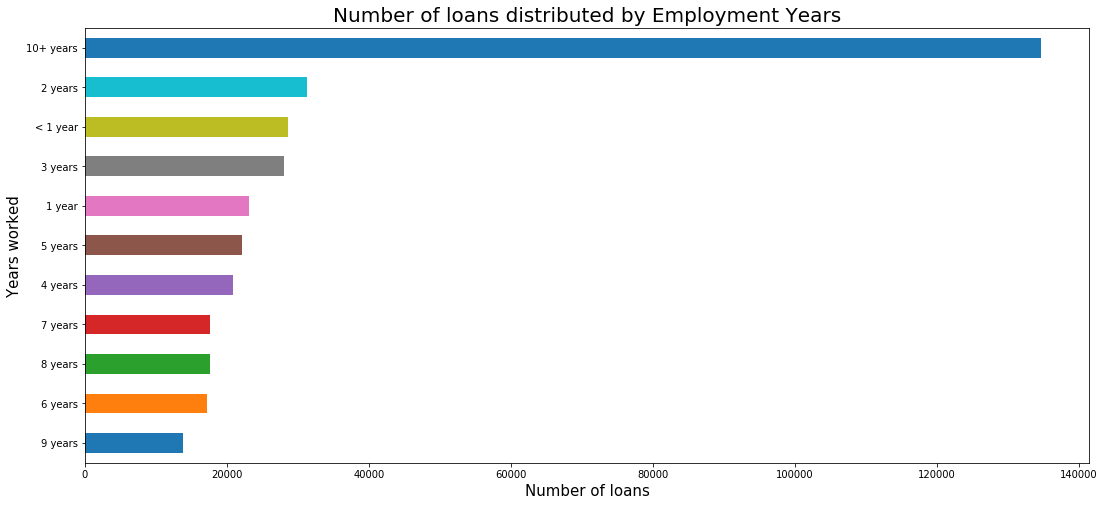

In [40]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


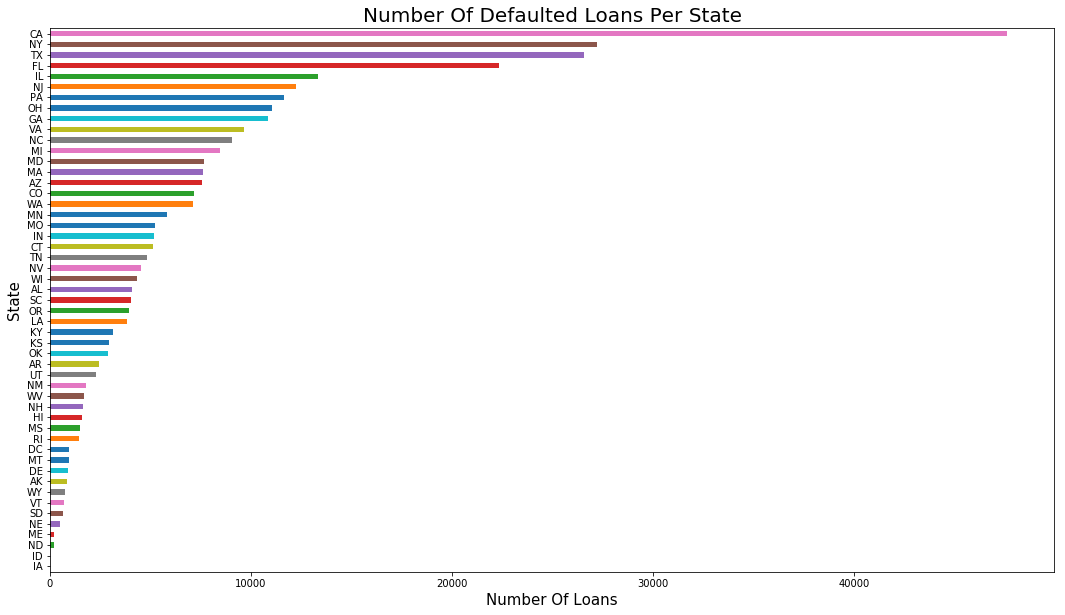

In [41]:
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

Loan Amount Distribution BoxPlot


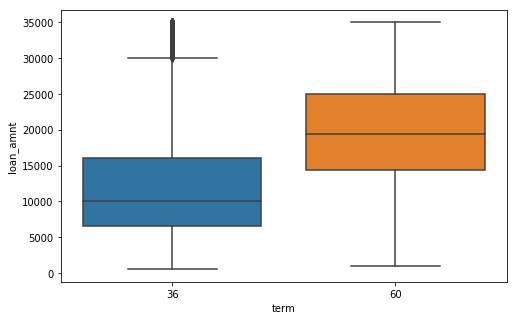

In [42]:
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=df.term, y=df.loan_amnt)

Text(0,0.5,'Loan Amount')

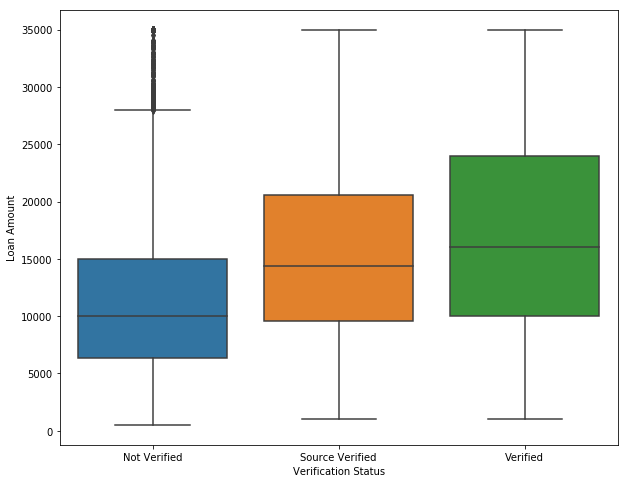

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df.verification_status, y=df.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")

In [44]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[purp_loan[0]], df[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,,
car,167,1988,6,5,19,1257,17,33,5,31
credit_card,3079,60000,102,32,123,17073,457,811,157,824
debt_consolidation,11073,142314,297,108,306,48358,1624,1897,595,2955
educational,29,1,0,14,28,111,0,0,0,0
home_improvement,910,13892,20,21,46,5079,154,201,60,255
house,121,758,4,4,12,562,16,14,2,22
major_purchase,342,4072,6,12,46,2157,52,77,16,73
medical,240,2189,8,10,15,936,19,26,8,53
moving,175,1270,4,3,11,628,14,18,9,40


In [45]:

cols= ['sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state',
       'initial_list_status', 'application_type']

for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))

In [46]:
correlation_m = df.corr()
correlation_m["Loan_Class"].sort_values(ascending=False)

Loan_Class                    1.000000
out_prncp                     0.158687
out_prncp_inv                 0.158685
last_pymnt_amnt               0.101074
total_rec_prncp               0.096068
initial_list_status           0.088230
total_pymnt_inv               0.043816
total_pymnt                   0.042890
annual_inc                    0.037404
revol_bal                     0.021588
total_acc                     0.019030
issue_d                       0.017741
open_acc                      0.015920
pub_rec                       0.013814
application_type              0.006756
collections_12_mths_ex_med    0.006586
addr_state                    0.006253
earliest_cr_line              0.002390
funded_amnt_inv               0.000301
acc_now_delinq               -0.000377
delinq_2yrs                  -0.001891
funded_amnt                  -0.002435
loan_amnt                    -0.003216
dti                          -0.007831
installment                  -0.013848
emp_length               

Text(0,0.5,'Frequency')

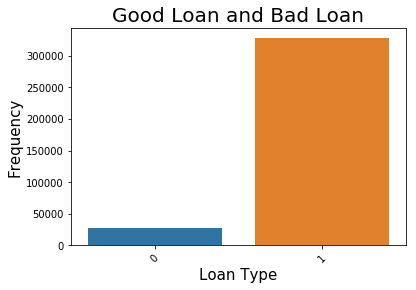

In [47]:
g= sns.countplot(df["Loan_Class"])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Good Loan and Bad Loan", fontsize=20)
g.set_xlabel("Loan Type", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)

In [48]:
from sklearn.model_selection import train_test_split
X = df.ix[:, df.columns != "Loan_Class"]
y = df["Loan_Class"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\AADHI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [50]:
log= LogisticRegression()
log.fit(X_train, y_train)

y_pred= log.predict(X_test)

# Summary of the prediction
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy of the model is: ", accuracy_score(y_pred,y_test))

C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5421
           1       0.99      1.00      1.00     65570

   micro avg       0.99      0.99      0.99     70991
   macro avg       0.99      0.95      0.97     70991
weighted avg       0.99      0.99      0.99     70991

[[ 4917   504]
 [   57 65513]]
Accuracy of the model is:  0.9920975898353313


C:\Users\AADHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


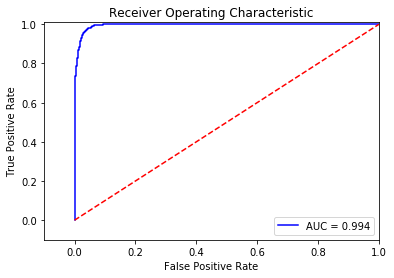

In [52]:
tmp = log.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()